# 04 Data Preprocessing & Modelling - Using Pipelines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting numpay arrays

In [3]:
pd.set_option('display.max_columns', None)

In [3]:
kiva_final = pd.read_csv('data/kiva_hh.csv')

In [4]:
## Delete irrelevant columns:
kiva_model = kiva_final.drop(['activity',  'date', 'borrower_genders', 'hv001', 'hv270',
                              'lat', 'lon', 'posted_time', 'disbursed_time', 'Level', 'asdf_id',
                              'loan_amount_usd'
                              #'partner_id', 'dist_coast', 'avg_pre',
                              #'avg_temp', 'pop_dens', 'conflict_deaths'
                                                         ], axis=1)
kiva_model.head(3)

,sector,country_code,region,partner_id,term_in_months,lender_count,repayment_interval,year,funded_amount_usd,gender,hv271,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities
0,Food,TZ,Bagamoyo,379.0,8.0,6.0,irregular,2015.0,0.138094,female,128721.0,72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745
1,Retail,TZ,Bagamoyo,379.0,14.0,11.0,monthly,2016.0,0.218182,female,128721.0,72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745
2,Clothing,TZ,Bagamoyo,379.0,8.0,10.0,irregular,2014.0,0.287316,female,128721.0,72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745


In [5]:
### Converting partner_id from numeric to object:
kiva_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90044 entries, 0 to 90043
Data columns (total 20 columns):
sector                90044 non-null object
country_code          90044 non-null object
region                90044 non-null object
partner_id            90044 non-null float64
term_in_months        90044 non-null float64
lender_count          90044 non-null float64
repayment_interval    90044 non-null object
year                  90044 non-null float64
funded_amount_usd     90044 non-null float64
gender                90044 non-null object
hv271                 90044 non-null float64
avg_pre               90044 non-null float64
avg_temp              90044 non-null float64
dist_coast            90044 non-null float64
pop_dens              90044 non-null float64
conflict_deaths       90044 non-null float64
nightlite             90044 non-null float64
physical_elevation    90044 non-null float64
gdp                   90044 non-null float64
access_cities         90044 non-null floa

In [6]:
### partner id should be a categorical varialbe:
kiva_model['partner_id'] = kiva_model['partner_id'].astype(object)

In [7]:
kiva_model.columns

Index(['sector', 'country_code', 'region', 'partner_id', 'term_in_months',
       'lender_count', 'repayment_interval', 'year', 'funded_amount_usd',
       'gender', 'hv271', 'avg_pre', 'avg_temp', 'dist_coast', 'pop_dens',
       'conflict_deaths', 'nightlite', 'physical_elevation', 'gdp',
       'access_cities'],
      dtype='object')

## 5.1 First - Regression based on individual region (each region is one observation; n=380)

In [35]:
# get the mean for all numeric variables:
kiva_regional_num = kiva_model.groupby("region").mean()
# get the mode for the categorical variables:
## select all the categorical variables:
kiva_regional_cat = kiva_model.select_dtypes(include=['object'])
## get the mode:
kiva_regional_cat = kiva_regional_cat.groupby("region").agg(lambda x:x.value_counts().index[0])
## merge them together
kiva_regional = pd.merge(kiva_regional_num,
                        kiva_regional_cat,
                        on='region',
                        how='left',
                        validate='1:1')
kiva_regional.head()

,term_in_months,lender_count,year,funded_amount_usd,hv271,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities,sector,country_code,partner_id,repayment_interval,gender
region,,,,,,,,,,,,,,,,,,,
AHERO,12.5,9.500000,2017.000000,2.901061,32972.0,148.403614,22.593334,650122.832539,275.565545,0.0,0.495094,1175.479981,0.184950,26.412179,Transportation,KE,133.0,monthly,male
APAC,12.0,8.500000,2016.000000,0.120611,-54954.0,115.563147,24.615531,993336.427981,78.974432,0.0,0.311204,1058.148108,0.028010,95.702993,Transportation,UG,222.0,monthly,male
Abaita Ababiri,14.0,24.642857,2014.714286,0.327104,109429.0,152.414997,23.240448,927067.057323,528.374088,0.0,1.393152,1167.069241,2.703955,23.374605,Retail,UG,65.0,monthly,female
"Aldina, Jomvu",10.0,7.333333,2017.000000,2.417551,63588.0,85.008673,27.194044,5544.499330,3325.450333,0.0,16.420256,41.682850,14.700700,1.742017,Food,KE,133.0,monthly,female
"Aldina,Jomvu",11.0,6.000000,2017.000000,1.450530,63588.0,85.008673,27.194044,5544.499330,3325.450333,0.0,16.420256,41.682850,14.700700,1.742017,Clothing,KE,133.0,monthly,female


In [9]:
kiva_regional.index

Index(['AHERO', 'APAC', 'Abaita Ababiri', 'Aldina, Jomvu', 'Aldina,Jomvu',
       'Aldina,Jomvu Kenya', 'Aleptong', 'Amuria', 'Arua', 'Arusha',
       ...
       'Zirobwe', 'Zombo', 'kabale', 'karatina', 'kasambya', 'kibuli',
       'kyengera', 'litein', 'malindi', 'nyeri'],
      dtype='object', name='region', length=380)

### Building Preprocessing Pipeline

In [10]:
## Split the dataset in train and test:

X=kiva_regional.drop('hv271', axis=1)
y=kiva_regional['hv271']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [11]:
### 1st step - scale the target variable (y) manually:
### Take min max scaler in order to ensure that the MPI is between 0 and 1:
from sklearn.preprocessing import MinMaxScaler
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1,1))
y_train = scaler.transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))


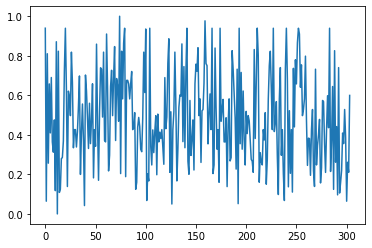

In [12]:
plt.plot(y_train)
plt.show()

In [13]:
### Create transformers based on the type of data (numeric vs categorical)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('sclaer', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [14]:
### Splitting into numeric and categorical features:
numeric_features = kiva_regional.select_dtypes(include=['int64', 'float64']).drop(['hv271'],axis=1).columns
categorical_features = kiva_regional.select_dtypes(include=['object']).columns

### Initiate the preprocessing pipeline:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [15]:
categorical_features

Index(['sector', 'country_code', 'repayment_interval', 'gender'], dtype='object')

### Building a model selection pipeline:

In [16]:
#### Create MAPE as an additional metric:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(((y_true) - (y_pred)) / (y_true))) * 100

In [17]:
#### Create relative RMSE:
def norm_rmse(y_true, y_pred):
    return np.mean(mean_squared_error(y_true, y_pred, squared=False) / (np.mean(y_true)))

#### Model selection

In [18]:
#Regression Models:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb


#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

#Building the pipeline:
## Adding all relevant regression models:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5, random_state=41),
    RandomForestRegressor(max_depth=5, random_state=41),
    linear_model.Lasso(alpha=1.0, random_state=41),
    Ridge(alpha=1.0),
    svm.SVR(), # Support Vector Regression
    AdaBoostRegressor(random_state=41),
    xgb.XGBRegressor(random_state=41) 
]

#Making predictions:
for regressor in regressors:
    pipe=Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', regressor)])
    pipe.fit(X_train, np.ravel(y_train))
    print('Model: %s' %regressor)
    y_pred=pipe.predict(X_test)
    print('----------------------')
    print('Results on Test-Data:')
    print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
          'MSE: %.4f' %  mean_squared_error(y_test, y_pred), '\n'
          'RMSE: %.4f' %  mean_squared_error(y_test, y_pred, squared=False), '\n'
          'R2: %.3f' % r2_score(y_test, y_pred))
    print('----------------------')
    print('Results on Train-Data (overfitting):')
    y_over=pipe.predict(X_train)
    print('n-RMSE: %.4f' % norm_rmse(y_train, y_over), '\n'
          'MSE: %.4f' %  mean_squared_error(y_train, y_over), '\n'
          'RMSE: %.4f' %  mean_squared_error(y_train, y_over, squared=False), '\n'
          'R2: %.3f' % r2_score(y_train, y_over))
    print('---------------------------------------------------')
    

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
----------------------
Results on Test-Data:
n-RMSE: 0.4143 
MSE: 0.0440 
RMSE: 0.2098 
R2: 0.046
----------------------
Results on Train-Data (overfitting):
n-RMSE: 0.4105 
MSE: 0.0395 
RMSE: 0.1988 
R2: 0.291
---------------------------------------------------
Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=41, splitter='best')
----------------------
Results on Test-Data:
n-RMSE: 0.3717 
MSE: 0.0354 
RMSE: 0.1883 
R2: 0.232
----------------------
Results on Train-Data (overfitting):
n-RMSE: 0.2825 
MSE: 0.0187 
RMSE: 0.1368 
R2: 0.664
------------------------------------

**Zielmetric**
**MSE**: bisher kann ich nur sagen, dass mein Modell (RF) eine mittlere Abweichung zu den tatsächlichen Werten von 0.03 hat (Zielvariable zw. 0 und 1)
1. the predictive values differ on average by 0.17 (RMSE)
2. *MAPE: Mean absolute percentage error very high (over 50%)* 
3. *MAPE regarding the trainging dataset does not have any meaning (values close to 0)*
4. normalized RMSE (n-RMSE): RMSE divided by the mean of y: the mean error as a percentage

* Evtl. erreichbar durch Sampling weights (Recherche nötig!)

### Deeper Look: Regression Tree models:

#### Decision Tree Regression:

In [19]:
reg_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeRegressor(random_state=41))])
reg_dt.fit(X_train, y_train)
y_pred = reg_dt.predict(X_test)
print('Results on Test-Data:')
print('Mean squared error: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))
print('Results on Train-Data (overfitting):')
print('Mean squared error: %.5f' % mean_squared_error(y_train, y_over), '\n'
      'R2: %.3f' % r2_score(y_train, y_over))

Results on Test-Data:
Mean squared error: 0.04482 
R2: 0.029
Results on Train-Data (overfitting):
Mean squared error: 0.00817 
R2: 0.854


#### Random Forest:

In [20]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(random_state=41))])
rf.fit(X_train, np.ravel(y_train))
y_pred = rf.predict(X_test)
print('Results on Test-Data:')
print('MSE: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'RMSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))
print('Results on Train-Data (overfitting):')
print('MSE: %.5f' % mean_squared_error(y_train, y_over), '\n'
      'RMSE: %.3f' % mean_squared_error(y_train, y_over, squared=False), '\n'
      'R2: %.3f' % r2_score(y_train, y_over))

Results on Test-Data:
MSE: 0.02598 
RMSE: 0.161 
R2: 0.437
Results on Train-Data (overfitting):
MSE: 0.00817 
RMSE: 0.090 
R2: 0.854


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, np.ravel(y_train), scoring="neg_mean_squared_error", cv=5) 
rmse_scores = np.sqrt(-scores)


print('Scores: ', rmse_scores)
print('Mean: ', rmse_scores.mean())
print('Std: ', rmse_scores.std())

Scores:  [0.18036893 0.1957549  0.20273914 0.15991207 0.19095174]
Mean:  0.18594535683572544
Std:  0.014914091371446147


#### Ada Regression:

In [22]:
ada = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', AdaBoostRegressor(random_state=41)),
                    ])
ada.fit(X_train, np.ravel(y_train))
y_pred = ada.predict(X_test)
print('Results on Test-Data:')
print('Mean squared error: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))
print('Results on Train-Data (overfitting):')
print('Mean squared error: %.5f' % mean_squared_error(y_train, y_over), '\n'
      'R2: %.3f' % r2_score(y_train, y_over))

Results on Test-Data:
Mean squared error: 0.02918 
R2: 0.368
Results on Train-Data (overfitting):
Mean squared error: 0.00817 
R2: 0.854


#### XBG Regression:

In [23]:
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', xgb.XGBRegressor(random_state=41))])
                       
xgb.fit(X_train, np.ravel(y_train))
y_pred = xgb.predict(X_test)
print('Results on Test-Data:')
print('Mean squared error: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))
print('Results on Train-Data (overfitting):')
print('Mean squared error: %.5f' % mean_squared_error(y_train, y_over), '\n'
      'R2: %.3f' % r2_score(y_train, y_over))                                        

[18:50:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results on Test-Data:
Mean squared error: 0.02819 
R2: 0.389
Results on Train-Data (overfitting):
Mean squared error: 0.00817 
R2: 0.854


#### Hyperparameter tuning:

The metric of choice is the Mean absolute percentage Error (**MAPE**). The function is created above the Model selection pipeline.
Sklearn does not support this metric, so it is neccessary to write an own scorer

In [24]:
## As a remainder, the function for MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
## Create a scorer for GridSearchCV:
from sklearn.metrics import make_scorer
mean_abs_perc_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [25]:
### Creating a scorer for the normalized RMSE:
## Remainder, function of RMSE:
def norm_rmse(y_true, y_pred):
    return np.mean(mean_squared_error(y_true, y_pred, squared=False) / (np.mean(y_true)))
## Create a scorer for GridSearchCV:
from sklearn.metrics import make_scorer
norm_rmse_scorer = make_scorer(norm_rmse, greater_is_better=False)

In [26]:
from sklearn.model_selection import GridSearchCV
### Decision Tree Regression:
param_grid = { 
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth' : [1,2,3,4,5]}

CV = GridSearchCV(reg_dt, param_grid, n_jobs= 1, cv=2, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

{'regressor__max_depth': 1, 'regressor__max_features': 'auto'}
-0.43717584106032575


In [27]:
### Random Forest:
### Grid Search on MSE:
param_grid = { 
    'regressor__n_estimators': [75, 100, 150, 200, 250, 300, 350],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth' : [8,9,10,11,12,13,14]}


CV = GridSearchCV(rf, param_grid, n_jobs= 1, cv=2, verbose=1, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

Fitting 2 folds for each of 147 candidates, totalling 294 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'regressor__max_depth': 12, 'regressor__max_features': 'log2', 'regressor__n_estimators': 150}
-0.40323648347787694


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  1.0min finished


In [28]:
### ADA Regression:
param_grid = {
    'regressor__n_estimators': [10,20,40,50, 100],
    'regressor__learning_rate' : [0.0001, 0.001, 0.01,0.05,0.1,0.3,1],
    'regressor__loss' : ['linear', 'square', 'exponential']
 }

CV = GridSearchCV(ada, param_grid, verbose=1, cv=2, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 105 candidates, totalling 210 fits
{'regressor__learning_rate': 0.3, 'regressor__loss': 'linear', 'regressor__n_estimators': 50}
-0.4039277844514204


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   15.7s finished


In [29]:
### XGB Regression:
param_grid = {
    'regressor__n_estimators': [50, 100,125,150],
    'regressor__learning_rate' : [0.001,0.01,0.05,0.1,0.3,1],
    'regressor__loss' : ['linear', 'square', 'exponential']
 }

CV = GridSearchCV(xgb, param_grid, n_jobs= 1, cv=2, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

**---------------------------------------------------------------------------------**

## 5.2 Regression analysis on all regions for DHS (n=755)

The first approach of connecting all datasources together did not yield to good results. Therefore I will restructure the data (Done in notebook 03: External Data) in order to maximize the number of observations

In [3]:
dhs_data = pd.read_csv('data/alt_reg.csv')
dhs_data.head()

,id,adm,gbid,Name,Level,adm_int,asdf_id,feature_id,iso,gqid,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities,hv271
0,0,ADM2,TZA_ADM2_1_3_3_0,Bagamoyo,ADM2,2,0,0,TZA,0,72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745,74709.821705
1,1,ADM2,TZA_ADM2_1_3_3_1,Bariadi,ADM2,2,1,1,TZA,1,85.210798,22.709856,593879.251148,62.247063,0.0,0.666162,1397.736922,0.039866,208.188586,-32083.531250
2,2,ADM2,TZA_ADM2_1_3_3_2,Chunya,ADM2,2,2,2,TZA,2,68.710584,22.100773,653603.658882,10.791717,0.0,0.442000,1276.919637,0.006065,443.887008,-75436.727273
3,3,ADM2,TZA_ADM2_1_3_3_3,Geita,ADM2,2,3,3,TZA,3,102.266276,23.218936,806125.113951,155.718972,0.0,0.252875,1245.520747,0.139157,75.545742,-17588.789744
4,4,ADM2,TZA_ADM2_1_3_3_4,Iramba,ADM2,2,4,4,TZA,4,72.120892,23.206947,527565.541653,48.365822,0.0,0.165557,1260.742708,0.042734,108.290394,-54983.441860


In [4]:
## Delete irrelevant columns:
dhs_model = dhs_data.drop(['id',  'adm', 'gbid', 'Name', 'Level',
                              'adm_int', 'asdf_id', 'feature_id', 'gqid'], axis=1)
dhs_model.head(3)




,iso,avg_pre,avg_temp,dist_coast,pop_dens,conflict_deaths,nightlite,physical_elevation,gdp,access_cities,hv271
0,TZA,72.890916,26.408804,49414.959752,25.266386,0.0,0.192784,228.443757,0.032569,125.102745,74709.821705
1,TZA,85.210798,22.709856,593879.251148,62.247063,0.0,0.666162,1397.736922,0.039866,208.188586,-32083.531250
2,TZA,68.710584,22.100773,653603.658882,10.791717,0.0,0.442000,1276.919637,0.006065,443.887008,-75436.727273


In [5]:
## Split the dataset in train and test:

X=dhs_model.drop('hv271', axis=1)
y=dhs_model['hv271']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [6]:
### 1st step - scale the target variable (y) manually:
### Take min max scaler in order to ensure that the MPI is between 0 and 1:
from sklearn.preprocessing import MinMaxScaler
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1,1))
y_train = scaler.transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

In [7]:
### Create transformers based on the type of data (numeric vs categorical)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('sclaer', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [8]:
### Splitting into numeric and categorical features:
numeric_features = dhs_model.select_dtypes(include=['int64', 'float64']).drop(['hv271'],axis=1).columns
categorical_features = dhs_model.select_dtypes(include=['object']).columns

### Initiate the preprocessing pipeline:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Building a model selection pipeline:

#### Implementing performance metric

For this approach the normalized RMSE seems to be the best performance metric. This metric is not (yet) supported by sklearn. Therefore, I have to implement it manually

In [9]:
#### Create normalized RMSE:
def norm_rmse(y_true, y_pred):
    return np.mean(mean_squared_error(y_true, y_pred, squared=False) / (np.mean(y_test)))

normalized RMSE (n-RMSE): RMSE divided by the mean of y: the mean error as a percentage


#### Model selection

In [29]:
#Regression Models:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor


#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

#Building the pipeline:
## Adding all relevant regression models:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5, random_state=41),
    RandomForestRegressor(max_depth=5, random_state=41),
    linear_model.Lasso(alpha=1.0, random_state=41),
    Ridge(alpha=1.0),
    svm.SVR(), # Support Vector Regression
    AdaBoostRegressor(random_state=41),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(random_state=41) 
]

#Making predictions:
for regressor in regressors:
    pipe=Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', regressor)])
    pipe.fit(X_train, np.ravel(y_train))
    print('Model: %s' %regressor)
    y_pred=pipe.predict(X_test)
    print('----------------------')
    print('Results on Test-Data:')
    print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
          'MSE: %.4f' %  mean_squared_error(y_test, y_pred), '\n'
          'RMSE: %.4f' %  mean_squared_error(y_test, y_pred, squared=False), '\n'
          'R2: %.3f' % r2_score(y_test, y_pred))
    print('----------------------')
    print('Results on Train-Data (overfitting):')
    y_over=pipe.predict(X_train)
    print('n-RMSE: %.4f' % norm_rmse(y_train, y_over), '\n'
          'MSE: %.4f' %  mean_squared_error(y_train, y_over), '\n'
          'RMSE: %.4f' %  mean_squared_error(y_train, y_over, squared=False), '\n'
          'R2: %.3f' % r2_score(y_train, y_over))
    print('---------------------------------------------------')
    

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
----------------------
Results on Test-Data:
n-RMSE: 0.2972 
MSE: 0.0125 
RMSE: 0.1118 
R2: 0.248
----------------------
Results on Train-Data (overfitting):
n-RMSE: 0.2555 
MSE: 0.0095 
RMSE: 0.0976 
R2: 0.416
---------------------------------------------------
Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=41, splitter='best')
----------------------
Results on Test-Data:
n-RMSE: 0.2559 
MSE: 0.0093 
RMSE: 0.0963 
R2: 0.442
----------------------
Results on Train-Data (overfitting):
n-RMSE: 0.1786 
MSE: 0.0047 
RMSE: 0.0682 
R2: 0.715
------------------------------------

### Deeper Look: Regression Tree models:

In this section i will have a deeper look at models which do have promissing outcomes which are basically all tree models. In the first step they are initialized and grpahs of the residuals are created to get a better understanding of the errors.
In the second part a CV Grid Search is implemented to fine-tune the hyperparamters of these models.

In [12]:
### Random Forest:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(random_state=41))])
rf.fit(X_train, np.ravel(y_train))
y_pred = rf.predict(X_test)
print('Results on Test-Data:')
print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
      'MSE: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'RMSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))

Results on Test-Data:
n-RMSE: 0.2295 
MSE: 0.00745 
RMSE: 0.086 
R2: 0.552


#### Deeper Look at resiudals

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


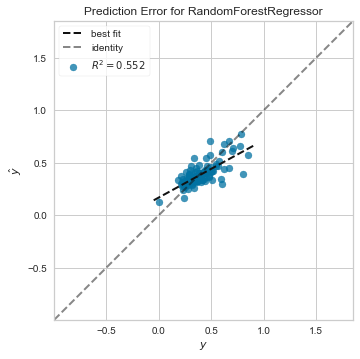

In [13]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = rf
visualizer = PredictionError(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

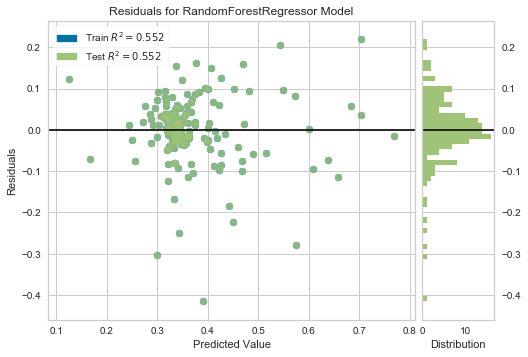

In [14]:
### Plotting the residulas:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(rf, X_test, np.ravel(y_test))

**Observation:** There are no abnormalities regarding the distribution of the errors

In [16]:
### ADA Boost
ada = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', AdaBoostRegressor(random_state=41)),
                    ])
ada.fit(X_train, np.ravel(y_train))
y_pred = ada.predict(X_test)
print('Results on Test-Data:')
print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
      'MSE: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'RMSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))

Results on Test-Data:
n-RMSE: 0.2453 
MSE: 0.00851 
RMSE: 0.092 
R2: 0.488


In [17]:
### Gradient Boost:
gdb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', GradientBoostingRegressor(random_state=41)),
                    ])
gdb.fit(X_train, np.ravel(y_train))
y_pred = gdb.predict(X_test)
print('Results on Test-Data:')
print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
      'MSE: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'RMSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))

Results on Test-Data:
n-RMSE: 0.2263 
MSE: 0.00724 
RMSE: 0.085 
R2: 0.564


In [21]:
### XG-Boost:
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', xgb.XGBRegressor(random_state=41, objective = 'reg:squarederror'))])
                       
xgb.fit(X_train, np.ravel(y_train))
y_pred = xgb.predict(X_test)
print('Results on Test-Data:')
print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
      'MSE: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'RMSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))

Results on Test-Data:
n-RMSE: 0.2321 
MSE: 0.00762 
RMSE: 0.087 
R2: 0.542


### Hyperparameter Tuning:

After havign a deepler look at the best performing models, in this section I will tune the hyperparamters in order to boost the performance of the Models

In [22]:
###1st Creating a scorer for the n-rmse Metric:
## Remainder, function of RMSE:
def norm_rmse(y_true, y_pred):
    return np.mean(mean_squared_error(y_true, y_pred, squared=False) / (np.mean(y_true)))
## Create a scorer for GridSearchCV:
from sklearn.metrics import make_scorer
norm_rmse_scorer = make_scorer(norm_rmse, greater_is_better=False)

In [24]:
## Importing package:
from sklearn.model_selection import GridSearchCV
### Random Forest:
### Grid Search on MSE:
param_grid = { 
    'regressor__n_estimators': [55,65,75, 100, 150, 200, 250, 300, 350],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth' : [13,14,15,16]}


CV = GridSearchCV(rf, param_grid, n_jobs= 1, cv=5, verbose=1, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  2.6min finished


{'regressor__max_depth': 14, 'regressor__max_features': 'auto', 'regressor__n_estimators': 75}
-0.20641754158208422


In [25]:
### ADA Regression:
param_grid = {
    'regressor__n_estimators': [40,50,80,90,100,110,125],
    'regressor__learning_rate' : [0.0001, 0.001, 0.01,0.05,0.1,0.3,1],
    'regressor__loss' : ['linear', 'square', 'exponential']
 }

CV = GridSearchCV(ada, param_grid, verbose=1, cv=5, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'regressor__learning_rate': 0.1, 'regressor__loss': 'square', 'regressor__n_estimators': 80}
-0.20942520030367967


[Parallel(n_jobs=1)]: Done 735 out of 735 | elapsed:  2.0min finished


In [26]:
### Gradient Boost:
param_grid={
    'regressor__n_estimators':[100], 
    'regressor__learning_rate': [0.1, 0.05, 0.02, 0.01], 
    'regressor__max_depth':[13,14,15,16],
    'regressor__min_samples_leaf':[3,5,9,17], 
    'regressor__max_features':[1.0, 0.3, 0.1] 
 }
CV = GridSearchCV(gdb, param_grid, verbose=1, cv=5, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'regressor__learning_rate': 0.05, 'regressor__max_depth': 16, 'regressor__max_features': 0.1, 'regressor__min_samples_leaf': 5, 'regressor__n_estimators': 100}
-0.2063127462528433


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  2.3min finished


In [27]:
### XGB Regression:
param_grid = {
    'regressor__n_estimators': [30,40,50, 100,125,150],
    'regressor__learning_rate' : [0.001,0.01,0.05,0.1,0.3,1],
    'regressor__loss' : ['linear', 'square', 'exponential']
 }

CV = GridSearchCV(xgb, param_grid, n_jobs= 1, cv=5, scoring=norm_rmse_scorer)
                  
CV.fit(X_train, np.ravel(y_train))  
print(CV.best_params_)    
print(CV.best_score_)

{'regressor__learning_rate': 0.1, 'regressor__loss': 'linear', 'regressor__n_estimators': 50}
-0.20594882817083535


### Stacking

In this section I will use a popular model to improve my predictions called stacking. I will combine the best models with the hyperparamter derived in the last part and 'stack' them to one model.
These outputs are used as inputs for the final model (the so-called 'Blender').

In [30]:
### Create a list with the relevant models and the best hyperparamters:
from sklearn.ensemble import GradientBoostingRegressor

estimators = [('rf', Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', 
                       RandomForestRegressor(max_depth=14,
                                             max_features='auto',
                                             n_estimators=75,
                                             random_state=41))])),
         
             ('ada',Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', 
                       AdaBoostRegressor(learning_rate=0.1,
                                         loss='square',
                                         n_estimators=80,
                                         random_state=41))])),
        
             ('gdb',Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator',
                       GradientBoostingRegressor(learning_rate= 0.05, 
                                                 max_depth= 16, 
                                                 max_features= 0.1, 
                                                 min_samples_leaf= 5, 
                                                 n_estimators= 100,
                                                 random_state=41))])),
         
             ('xgb',Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', 
                        xgb.XGBRegressor(learning_rate=0.1,
                                         loss='linear',
                                         n_estimators=50))]))
        ]

In [33]:
from sklearn.ensemble import StackingRegressor

### Create the stacking Model with a Random Forest - Blender:
stacked_model = StackingRegressor(
                    estimators=estimators,
                    final_estimator=xgb.XGBRegressor(learning_rate=0.1,
                                         loss='linear',
                                         n_estimators=50,
                                         objective = 'reg:squarederror',
                                         random_state=41))

stacked_model.fit(X_train, np.ravel(y_train))#.score(X_test, y_test)
y_pred = stacked_model.predict(X_test)
print('Results on Test-Data:')
print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
      'MSE: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'RMSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))

[10:13:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results on Test-Data:
n-RMSE: 0.2338 
MSE: 0.00773 
RMSE: 0.088 
R2: 0.535


Unfortunately, there is no improvement in stacking the best models 

### Best model XG Boost:

In [34]:
### XG-Boost:
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', xgb.XGBRegressor(learning_rate=0.1,
                                                     loss='linear',
                                                     n_estimators=50, 
                                                     random_state=41,
                                                     objective = 'reg:squarederror'))])
                       
xgb.fit(X_train, np.ravel(y_train))
y_pred = xgb.predict(X_test)
print('Results on Test-Data:')
print('n-RMSE: %.4f' % norm_rmse(y_test, y_pred), '\n'
      'MSE: %.5f' % mean_squared_error(y_test, y_pred), '\n'
      'RMSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False), '\n'
      'R2: %.3f' % r2_score(y_test, y_pred))   

Results on Test-Data:
n-RMSE: 0.2291 
MSE: 0.00742 
RMSE: 0.086 
R2: 0.553


In [35]:
##### Getting column names after preprocessing step (in pipeline):
onehot_columns = list(xgb.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

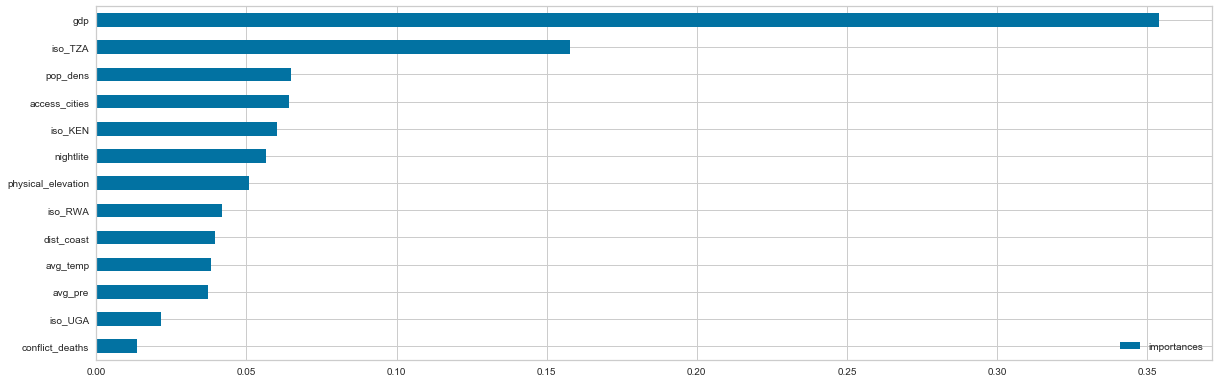

In [36]:
##### Getting feature importance out of the Random Forest Regression:
importances = xgb['regressor'].feature_importances_
importances = pd.DataFrame(importances,  index=numeric_features_list, columns=['importances'])
imp_graph=importances.sort_values(by='importances', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));